In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

In [3]:
# Inspect data 
len(train_users.id.unique()), len(test_users.id.unique()), train_users.shape, test_users.shape

(213451, 62096, (213451, 16), (62096, 15))

In [4]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0)
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [5]:
users.columns, users.shape

(Index([u'affiliate_channel', u'affiliate_provider', u'age',
        u'country_destination', u'date_account_created', u'date_first_booking',
        u'first_affiliate_tracked', u'first_browser', u'first_device_type',
        u'gender', u'id', u'language', u'signup_app', u'signup_flow',
        u'signup_method', u'timestamp_first_active'],
       dtype='object'), (275547, 16))

In [6]:
# Replace null in Gender field
users.gender.replace('-unknown-', np.nan, inplace=True)

In [7]:
# Change Dates columns to Python Date format
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
#users['date_account_created'].fillna(df_all.timestamp_first_active, inplace=True)

In [8]:
# Inspect Age outliers and remove the outliers
print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

2928
59
116866


In [9]:
# Nullify outliers
users.loc[users['age'] > 90,'age'] = np.NaN
users.loc[users['age'] < 15,'age'] = np.NaN

print len(users[users['age'] > 90])
print len(users[users['age'] < 15])
print len(users[users['age'].isnull()])

0
0
119853


In [10]:
users.fillna({'age':-1}, inplace=True)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05
5,other,other,-1,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,NaN,osr2jwljor,en,Web,0,basic,2010-01-01 21:56:19
6,other,craigslist,46,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,2010-01-02 01:25:58
7,direct,direct,47,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,2010-01-03 19:19:05
8,other,craigslist,50,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,2010-01-04 00:42:11
9,other,craigslist,46,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,NaN,6uh8zyj2gn,en,Web,0,basic,2010-01-04 02:37:58


In [11]:
# Extract Date Features
import datetime as dt
users['day_account_created'] = users['date_account_created'].dt.weekday
users['month_account_created'] = users['date_account_created'].dt.month
users['quarter_account_created'] = users['date_account_created'].dt.quarter
users['year_account_created'] = users['date_account_created'].dt.year
users['hour_first_active'] = users['timestamp_first_active'].dt.hour
users['day_first_active'] = users['timestamp_first_active'].dt.weekday
users['month_first_active'] = users['timestamp_first_active'].dt.month
users['quarter_first_active'] = users['timestamp_first_active'].dt.quarter
users['year_first_active'] = users['timestamp_first_active'].dt.year
users['created_less_active'] = (users['date_account_created'] - users['timestamp_first_active']).dt.days

In [12]:
users.shape

(275547, 26)

In [13]:
t_users = users.copy()
t_users = t_users.set_index('id')

cat_features = ['affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'first_browser',
 'first_device_type',
 'gender',
 'language',
 'signup_app',
 'signup_flow',
 'signup_method']
num_features = ['day_account_created',
 'month_account_created',
 'quarter_account_created',
 'year_account_created',
 'hour_first_active',
 'day_first_active',
 'month_first_active',
 'quarter_first_active',
 'year_first_active',
 'created_less_active']
target = ['country_destination']

In [14]:
encode_users = pd.get_dummies(t_users[cat_features])

In [15]:
encode_users.shape, t_users[num_features].shape

((275547, 135), (275547, 10))

In [16]:
df_users = pd.merge(t_users[num_features], encode_users, how='inner', left_index=True, right_index=True)

In [17]:
df_users.shape

(275547, 145)

In [18]:
# Join/Merge with session data
user_devices = pd.read_csv('./data/user_devices.csv')
user_session = pd.read_csv('./data/user_session_detail.csv')

In [19]:
user_devices.shape, user_session.shape, df_users.shape

((135483, 15), (135478, 156), (275547, 145))

In [20]:
df_users = df_users.reset_index()
all_users = pd.merge(df_users, user_devices, how='left', left_on='id', right_on='user_id')
all_users = pd.merge(all_users, user_session, how='left', left_on='id', right_on='user_id')

In [21]:
all_users.shape

(275547, 317)

In [22]:
destination = t_users['country_destination'].reset_index()

In [23]:
all_users = pd.merge(all_users, destination, how='inner', on='id')

In [24]:
all_users = all_users.drop(['user_id_x','user_id_y'], axis=1)

In [25]:
all_users.shape

(275547, 316)

In [27]:
# Split train and test data
df_test = all_users[all_users['country_destination'].isnull()]
df_train = all_users[all_users['country_destination'].isnull()==False]

In [28]:
df_test.shape, df_train.shape

((62096, 316), (213451, 316))

In [29]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [30]:
from sklearn.preprocessing import LabelEncoder
labels = df_train['country_destination']
le = LabelEncoder()
y = le.fit_transform(labels)
X = df_train.drop('country_destination', axis=1, inplace=False)

In [31]:
X.shape, y.shape

((213451, 315), (213451,))

In [32]:
idtrain = df_train['id']
X = X.drop('id', axis=1, inplace=False)

In [34]:
# Model 2
# Grid Search - Used to find best combination of parameters
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search

# Skip Grid search for time saving
final_model = XGBClassifier(
        learning_rate =0.1,
        n_estimators=25,
        max_depth=3,
        objective='multi:softprob', 
        subsample=0.5, 
        colsample_bytree=0.5, 
        seed=0)
final_model.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

In [35]:
# Cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(final_model, X, y, cv=5)

In [36]:
scores

array([ 0.17536011,  0.56646289,  0.552107  ,  0.59417166,  0.59300909])

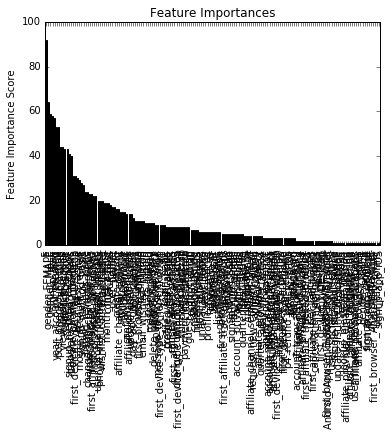

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(final_model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [38]:
feat_imp[:20]

p5                               92
gender_FEMALE                    64
gender_MALE                      59
signup_flow                      58
pending                          57
year_account_created             53
post_checkout_action             53
signup_app_Web                   44
view_search_results              44
year_first_active                43
message_post                     43
signup_method_facebook           41
translate_listing_reviews        40
create_phone_numbers             31
first_device_type_Mac Desktop    31
hour_first_active                30
month_account_created            29
signup_method_basic              28
p3                               27
listing_reviews_page             24
dtype: int64

In [39]:
#Prepare data for prediction
df_test = df_test.drop('country_destination', axis=1, inplace=False)
id_test = df_test['id']
X_test = df_test.drop('id', axis=1, inplace=False)
X_test.shape

(62096, 314)

In [41]:
# Make predictions
y_pred = final_model.predict_proba(X_test)

In [42]:
id_test = id_test.reset_index()
ids_test = id_test.id.values

In [43]:
#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(ids_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [44]:
len(ids), len(cts), ids[:10], cts[:10]

(310480,
 310480,
 ['5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  '5uwns89zht',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j',
  'jtl0dijy2j'],
 ['NDF', 'US', 'other', 'FR', 'IT', 'NDF', 'US', 'other', 'FR', 'IT'])

In [45]:
#Generate submission
print("Outputting final results...")
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('./data/submission-2016-10-27.csv', index=False)

Outputting final results...
